<h1 style="text-align: center;"> Estadística </h1>
<h1 style="text-align: right; font-size: 24px; margin-right: 10px;"> Guillermo Díaz Aguado </h1>

In [113]:
import pandas as pd
import numpy as np
from collections import Counter
from scipy.stats import skew # Para sacar la asimetria 
from scipy.stats import kurtosis # Para sacar la curtosis
from scipy.stats import kstest # Para sacar la prueba de Kolmogorov-Smirnov
from scipy.stats import norm # Para tener el objeto de una distribucion normal
import sklearn.preprocessing
import seaborn as sns
import matplotlib.pyplot as plt

## Ejercicio 1. Cráneos egipcios

In [114]:
df = pd.read_excel("datosejercicioevaluacionanchuras.xlsx")
tempr = df[df["Época histórica"]==1]
tempr = tempr[["Anchura del cráneo"]]
tard = df[df["Época histórica"]==2]
tard = tard[["Anchura del cráneo"]]


### a.1. Obtener con Python las diferentes medidas de centralización y dispersión, asimetría y curtosis estudiadas. 

En los siguientes ejercicios, la mayoría de lo que se pide está impementado en python como funciones o métodos en alguna librería, es por ello que además de usar estas funciones he decidido realizar las cuentas a manos. Esto es para que yo aprenda mejor estos conceptos y es únicamente informació rebundante.

In [115]:
registros, columnas = df.shape
registros, columnas

(60, 2)

In [133]:
# Medidas de centralización.
# Media aritmetica. 
media = df["Anchura del cráneo"].mean()
media_1 = df["Anchura del cráneo"].sum() / registros
print(f"La media aritmetica usando funciones intrinsecas de pandas es: {media}, y la media aritmetica calculada es: {media_1}")
media

La media aritmetica usando funciones intrinsecas de pandas es: 132.0, y la media aritmetica calculada es: 132.0


132.0

In [134]:
# Media geometrica
array = np.array(df["Anchura del cráneo"])
media_geo = np.exp(np.sum(np.log(array))*(1/registros))
print(f"La media geometrica calculada es: {media_geo}")

La media geometrica calculada es: 131.99609513313135


In [135]:
# Mediana.
mediana = df["Anchura del cráneo"].median()
# De manera calculada
ordenados = df.sort_values(by="Anchura del cráneo", ignore_index=True)
if registros % 2 == 1:
    mediana_1 = ordenados["Anchura del cráneo"][registros/2-1]
else:
    mediana_1 = (ordenados["Anchura del cráneo"][registros/2-1]+ordenados["Anchura del cráneo"][registros/2])/2

print(f"La mediana usando funciones intrinsecas de pandas es: {mediana}, y la mediana calculada es: {mediana_1}")


La mediana usando funciones intrinsecas de pandas es: 132.0, y la mediana calculada es: 132.0


In [136]:
# Percentiles 
quantil_25 = df["Anchura del cráneo"].quantile(0.25)
quantil_75 = df["Anchura del cráneo"].quantile(0.75)
percentil_10 = df["Anchura del cráneo"].quantile(0.1)

print(f"Quantil 25: {quantil_25}")
print(f"Quantil 75: {quantil_75}")
print(f"Percentil 10: {percentil_10}")

Quantil 25: 131.0
Quantil 75: 133.0
Percentil 10: 131.0


In [137]:
# Moda
moda = df["Anchura del cráneo"].mode().iloc[0]

# De manera calculada
contador = Counter(df["Anchura del cráneo"])
moda_1 = contador.most_common(1)[0][0]
print(f"La moda usando funciones intrinsecas de pandas es: {moda}, y la moda calculada es: {moda_1}")
    


La moda usando funciones intrinsecas de pandas es: 132, y la moda calculada es: 132


In [138]:
# Medidas de dispersión.
# Rango
rango = df['Anchura del cráneo'].max() - df['Anchura del cráneo'].min()
print(f"La rango usando funciones intrinsecas de pandas es: {rango}, y la rango calculada es: {rango}")

La rango usando funciones intrinsecas de pandas es: 5, y la rango calculada es: 5


In [139]:
# Varianza
varianza = df["Anchura del cráneo"].var()

# De manera calculada 
columna = np.array(df["Anchura del cráneo"])
varianza_1 = np.sum((columna - media)**2)/(registros-1)
print(f"La varianza usando funciones intrinsecas de pandas es: {varianza}, y la varianza calculada es: {varianza_1}")

# Desviación estándar
des_std = df["Anchura del cráneo"].std()
# De manera calculada
des_std_1 = varianza_1**(1/2)
print(f"La desviacion estandar usando funciones intrinsecas de pandas es: {des_std}, y la desviacion estandar calculada es: {des_std_1}")

# Coeficiente de variacion de Pearson
CV = des_std/media
print(f"El Coeficiente de variacion de Pearson es {CV}")

La varianza usando funciones intrinsecas de pandas es: 1.0508474576271187, y la varianza calculada es: 1.0508474576271187
La desviacion estandar usando funciones intrinsecas de pandas es: 1.0251085101720299, y la desviacion estandar calculada es: 1.0251085101720299
El Coeficiente de variacion de Pearson es 0.0077659735619093175


In [140]:
# Medidas de forma
# Asimetria
asim = skew(df["Anchura del cráneo"])

# De manera calculada
array = np.array(df["Anchura del cráneo"])
numerador = np.sum((array-media)**3)
asim_1 = numerador/((registros-1)*des_std**3)

# Calculo para coincidir con la funcion de skew de scipy
varianza_2 = np.sum((columna - media)**2)/(registros)
N = registros
numerador = np.sum((array-media)**3)/N
asim_2 = numerador/(varianza_2)**(3/2)

print(f"La asimetria usando funciones intrinsecas de scipy es: {asim}, y la asimetria calculada es: {asim_1}, y {asim_2}")

La asimetria usando funciones intrinsecas de scipy es: 0.4760026227464174, y la asimetria calculada es: 0.4720192671707838, y 0.4760026227464174


Es interesante por que scipy usa *n grados de libertad*, mientras que pandas usa *n-1 grados de libertad*. Y esto lo he comprobado en las ecuaciones anteriores. 

In [141]:
# Curtosis
curtosis = kurtosis(df["Anchura del cráneo"])

# De manera calculada
N = registros-1
varianza_2 = np.sum((columna - media)**2)/(N)
numerador = np.sum((array-media)**4)
curtosis_1 = numerador/(N*varianza_2**2)-3
 
print(f"El coeficiente de curtosis usando funciones intrinsecas de scipy es: {curtosis}, y el curtosis calculado es: {curtosis_1}")

El coeficiente de curtosis usando funciones intrinsecas de scipy es: 0.02809573361082185, y el curtosis calculado es: -0.022372528616025456


### a.2 Diagramas de caja y bigotes.

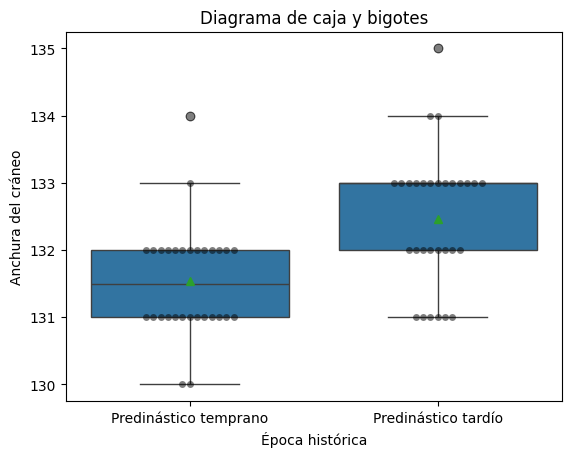

In [142]:
sns.boxplot(x='Época histórica', y='Anchura del cráneo', data=df, showmeans=True)
sns.swarmplot(x='Época histórica', y='Anchura del cráneo', data=df, color='black', alpha=0.5)
plt.title('Diagrama de caja y bigotes')
plt.xticks(ticks=[0,1], labels=["Predinástico temprano", "Predinástico tardío"])
plt.show()

[132 133 131 133 133 133 134 132 131 133 133 133 132 133 133 133 133 131
 135 131 133 132 132 132 131 134 131 133 132 132]


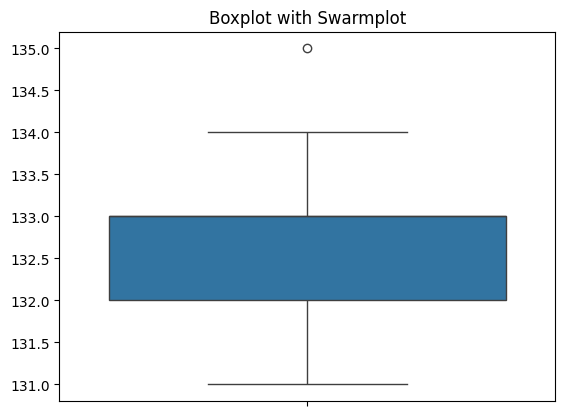

In [143]:
df1 = np.array(df[df["Época histórica"]==2]["Anchura del cráneo"])
print(df1)
sns.boxplot(data=df1)
#sns.swarmplot(x='Época histórica', y='Anchura del cráneo', data=df, color='black', alpha=0.5)
plt.title('Boxplot with Swarmplot')
plt.show()

## b. Determinar si las dos clases de muestras siguen una distribución normal mediante el test Kolmogorov-Smirnov

Lo primero que voy a hacer es estandarizar los datos, ya que es necesario para hacer esta prueba.
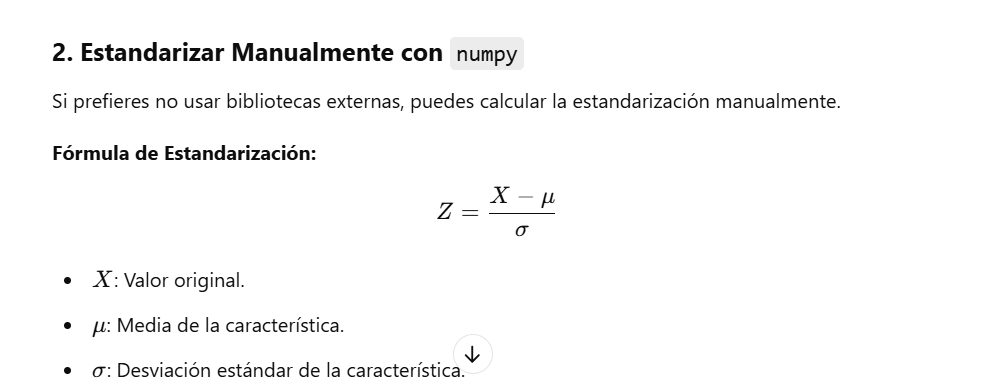

In [144]:
# Usando la libreria de sklearn
def estandarizador(datos):
    escalad = sklearn.preprocessing.StandardScaler()
    return escalad.fit_transform(datos)

stand_temp = estandarizador(tempr.to_numpy())
stand_tard = estandarizador(tard.to_numpy())



In [145]:
# Creandola yo
def estandarizador_1(datos):
    

SyntaxError: incomplete input (536530630.py, line 3)

In [132]:
stand_tard = 0
tard_test_ks = kstest(arr_tard, cdf="norm")